데이터 형태 (199991, 21)

In [1]:
# 패키지 임포트
import pandas as pd

# 데이터 불러오기
train = pd.read_csv('../Data/orb_data/train.csv', index_col=0)
test = pd.read_csv('../Data/orb_data/test.csv', index_col=0)
sample_submission = pd.read_csv('../Data/orb_data/sample_submission.csv', index_col=0)

# Train 데이터의 타입을 Sample_submission에 대응하는 가변수 형태로 변환
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x : to_number(x, column_number))

# 모델에 적용할 데이터 셋 준비 
train_x = train.drop(columns=['type', 'type_num'], axis=1)
train_y = train['type_num']
test_x = test

In [2]:
# 훈련 데이터와 테스트 데이터로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2)

# One-Hot Encoding
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [3]:
# 모델 구성
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

# model.add(Dense(5, input_dim=1))
model.add(Dense(512, input_shape=(21,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(19, activation='softmax'))

# 모델 요약
model.summary()

# 훈련
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # kinds of loss = [mse, mae]
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=256) # epochs number changeable

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               11264     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 128)              

127993/127993 [==============================] - 2s 16us/step - loss: 0.5716 - accuracy: 0.8054 - val_loss: 0.5555 - val_accuracy: 0.8085
Epoch 43/100
127993/127993 [==============================] - 2s 16us/step - loss: 0.6286 - accuracy: 0.7983 - val_loss: 0.5482 - val_accuracy: 0.8203
Epoch 44/100
127993/127993 [==============================] - 2s 16us/step - loss: 0.5532 - accuracy: 0.8107 - val_loss: 0.5372 - val_accuracy: 0.8131
Epoch 45/100
127993/127993 [==============================] - 2s 16us/step - loss: 0.5852 - accuracy: 0.8012 - val_loss: 0.5243 - val_accuracy: 0.8244
Epoch 46/100
127993/127993 [==============================] - 2s 16us/step - loss: 0.5699 - accuracy: 0.8052 - val_loss: 0.5596 - val_accuracy: 0.8169
Epoch 47/100
127993/127993 [==============================] - 2s 16us/step - loss: 0.5556 - accuracy: 0.8101 - val_loss: 0.6817 - val_accuracy: 0.7662
Epoch 48/100
127993/127993 [==============================] - 2s 16us/step - loss: 0.5601 - accuracy: 0.807

127993/127993 [==============================] - 2s 16us/step - loss: 0.4922 - accuracy: 0.8302 - val_loss: 0.4668 - val_accuracy: 0.8415
Epoch 97/100
127993/127993 [==============================] - 2s 16us/step - loss: 0.4926 - accuracy: 0.8306 - val_loss: 0.4653 - val_accuracy: 0.8422
Epoch 98/100
127993/127993 [==============================] - 2s 16us/step - loss: 0.4939 - accuracy: 0.8298 - val_loss: 0.4576 - val_accuracy: 0.8428
Epoch 99/100
127993/127993 [==============================] - 2s 16us/step - loss: 0.4907 - accuracy: 0.8307 - val_loss: 0.4869 - val_accuracy: 0.8319
Epoch 100/100
127993/127993 [==============================] - 2s 16us/step - loss: 0.4952 - accuracy: 0.8286 - val_loss: 0.5643 - val_accuracy: 0.8069


In [4]:
# 평가예측
loss, accuracy = model.evaluate(X_test, y_test, batch_size=256)
print('loss: ', loss)
print('accuracy: ', accuracy)

39999/39999 [==============================] - 0s 5us/step
loss:  0.5623215161525278
accuracy:  0.8086702227592468


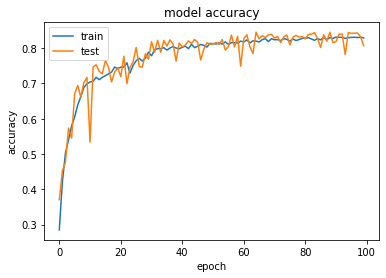

In [5]:
# summarize history for accuracy
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

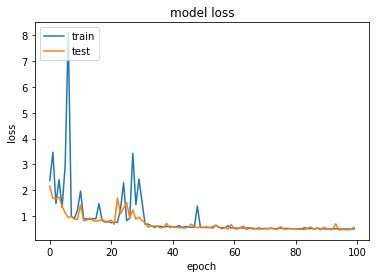

In [6]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
# Evaluating in optimal parameter
y_pred = model.predict(test_x)
print(y_pred)

'''
# # 제출 파일 생성
# submission = pd.DataFrame(data=y_pred, columns=sample_submission.columns, index=sample_submission.index)
# submission.to_csv('submission.csv', index=True)
'''

[[2.61701728e-12 4.19242880e-08 2.56425003e-04 ... 6.18352871e-08
  1.73232198e-04 6.74996727e-06]
 [2.03835157e-07 1.17612342e-06 1.07423261e-08 ... 7.88503606e-16
  6.13454977e-05 7.87469093e-04]
 [4.43168892e-06 2.35685093e-06 5.64026958e-15 ... 5.94463700e-10
  9.71113604e-06 1.24527742e-06]
 ...
 [5.53318896e-18 1.04054205e-22 2.72446618e-32 ... 0.00000000e+00
  1.00951332e-22 6.57654001e-11]
 [1.02276698e-09 1.31318938e-08 3.34960521e-13 ... 7.73795218e-37
  2.08853430e-06 1.40846800e-03]
 [1.40539734e-04 2.35679363e-06 5.35474961e-26 ... 5.46648129e-14
  3.87955288e-06 3.79211298e-04]]


"\n# # 제출 파일 생성\n# submission = pd.DataFrame(data=y_pred, columns=sample_submission.columns, index=sample_submission.index)\n# submission.to_csv('submission.csv', index=True)\n"

결과 분석: fiberID가 아무런 의미가 없으므로 행을 삭제한다.